<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/2_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist

# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
# Check to see if we're using GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9024536728793297596
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14378926080
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1978835226631542496
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [4]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


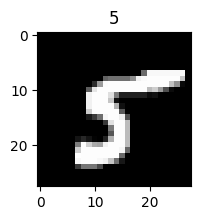

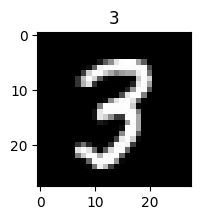

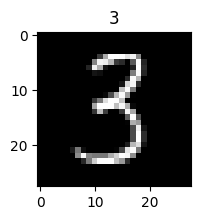

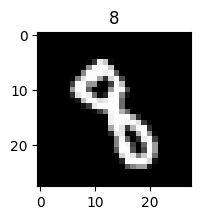

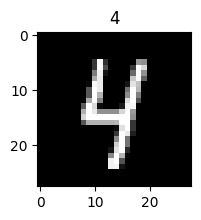

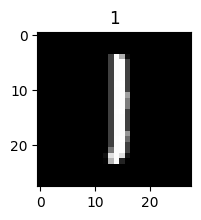

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title, image=None, size=6):
  if image.any():
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
  else:
    print("Image not found")


# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  title = y_train[random_num]
  imshow(title, img, size=2)

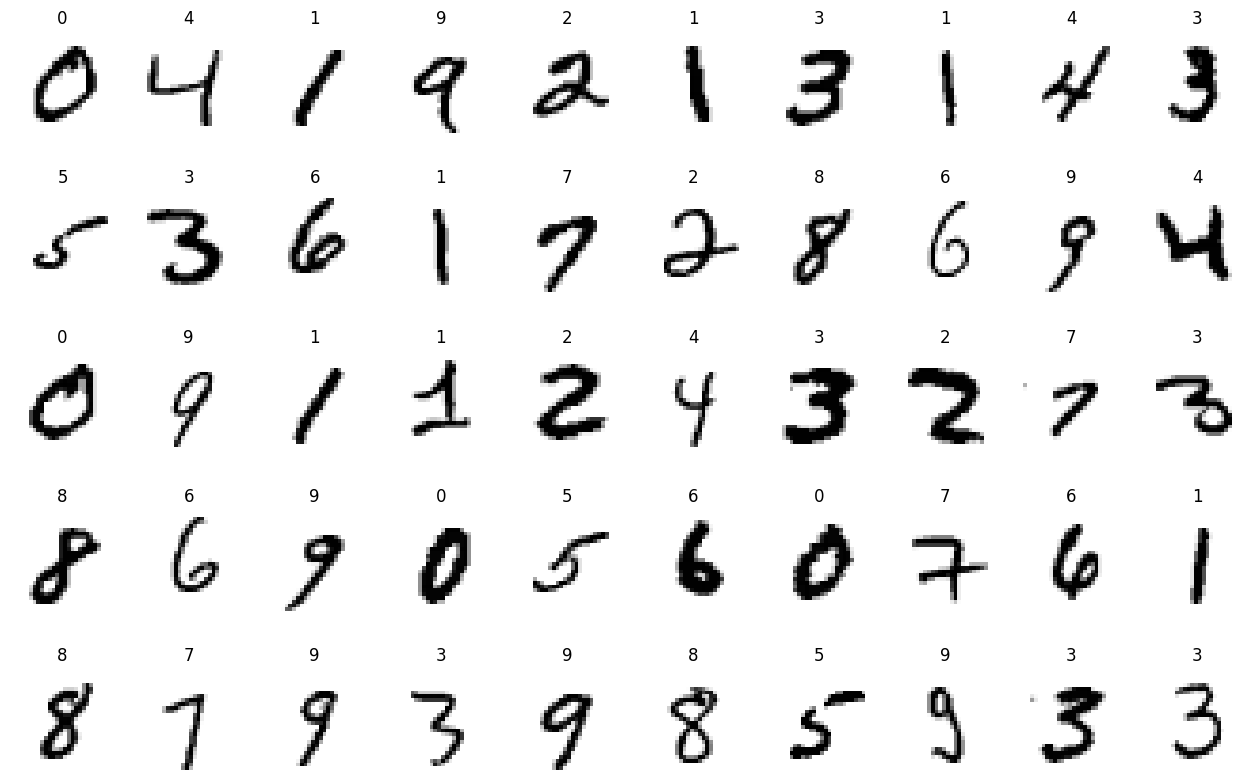

In [9]:
#figure = plt.figure()
plt.figure(figsize=(16,10))

num_images = 50

for index in range(1, num_images+1):
  plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
  plt.axis('off')
  plt.imshow(x_train[index], cmap='gray_r')

In [10]:
# Preprocess the data
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Add an extra dimension to the data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

# change datatype to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data to 0 - 1 range
x_train /= 255.0
x_test /= 255.0

